In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 4-1: Datasets

## Dataset for Regression

In [3]:
N, n_feature = 8, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias

print(f'X(shape/dtype/data): {X.shape} / {X.dtype}\n{X.numpy()}\n')
print(f'Y(shape/dtype/data): {Y.shape} / {Y.dtype}\n{Y.numpy()}\n')

X(shape/dtype/data): (8, 5) / <dtype: 'float32'>
[[-0.35938668 -0.4619915   0.90240604 -1.3211447   0.0276941 ]
 [-0.5652988   1.488596    0.7664178   0.38497162  0.46560696]
 [-0.4568119   0.27976617  1.3193771   2.19524    -1.3071597 ]
 [-0.01736309  0.7896163  -0.16511253  0.7431467  -1.1665913 ]
 [-1.6134104  -0.5758118   0.49263132 -0.26547083 -1.5272034 ]
 [ 1.1302925   0.13941982  0.11947903 -0.08329793 -1.7500789 ]
 [ 2.096726    0.0604864  -1.2115618  -2.6425648   0.80877364]
 [-0.19230796 -0.1691376   0.924496    0.28369308 -0.38559586]]

Y(shape/dtype/data): (8,) / <dtype: 'float32'>
[6.27774048e+00 1.85790672e+01 1.63060150e+01 8.20616245e+00
 1.49593353e-02 2.68398285e+00 2.05662251e+00 1.14496975e+01]



## Dataset for Binary Classification

In [5]:
N, n_feature = 8, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias
Y = tf.cast(Y > 5, tf.int32)

print(f'X(shape/dtype/data): {X.shape} / {X.dtype}\n{X.numpy()}\n')
print(f'Y(shape/dtype/data): {Y.shape} / {Y.dtype}\n{Y.numpy()}\n')

X(shape/dtype/data): (8, 5) / <dtype: 'float32'>
[[-7.3091783e-02  4.0183443e-01  3.6845922e-01  3.5692191e-01
   2.8029475e-01]
 [-1.8515484e+00  2.5996888e-01 -3.8553584e-02 -6.8939817e-01
  -1.8977567e+00]
 [-7.9184487e-02  3.2744020e-01 -1.2272694e-01 -1.2821193e+00
   1.0917169e-01]
 [ 5.0621766e-01 -9.3424320e-01 -1.0194384e+00 -8.2604021e-01
  -6.1301608e-03]
 [ 9.3254364e-01 -1.8549296e-01  1.1724547e+00  2.1048991e-01
   1.9504620e-01]
 [ 1.3042991e-01  7.6940453e-01 -3.8041589e-03  7.3098443e-02
  -1.7013150e-01]
 [ 1.0593957e+00  6.9112825e-01 -3.9122463e-04  1.4302821e+00
   6.0202535e-02]
 [-2.0695145e+00  1.3819890e-01  2.0521944e+00 -8.0806488e-01
  -1.6612159e+00]]

Y(shape/dtype/data): (8,) / <dtype: 'int32'>
[1 0 1 0 1 1 1 0]



## Dataset for Multi-class Classfication

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

X(shape/dtype/data): (24, 2) / <dtype: 'float32'>
[[-13.886451   -13.06497   ]
 [-12.887031   -13.402066  ]
 [-13.592842   -13.474688  ]
 [-13.778847   -15.23767   ]
 [-12.901845   -14.636336  ]
 [-13.411532   -12.354375  ]
 [-12.992045   -15.370685  ]
 [-13.757642   -13.718271  ]
 [ -9.883039    -6.6950126 ]
 [-10.179725    -6.881301  ]
 [ -9.30606     -8.638853  ]
 [ -8.074583    -5.1893215 ]
 [ -9.896914    -6.857018  ]
 [ -9.901387    -6.467023  ]
 [ -9.572097    -6.2067323 ]
 [ -8.528992    -6.7406173 ]
 [  2.132954    -6.5554576 ]
 [  2.234487    -7.442594  ]
 [  0.877174    -6.6392155 ]
 [  1.3380548   -6.835214  ]
 [  0.31021762  -7.875701  ]
 [  1.2195263   -5.9404488 ]
 [  0.3008424   -6.86066   ]
 [ -1.1451228   -6.239487  ]]

Y(shape/dtype/data): (24, 1) / <dtype: 'int32'>
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]



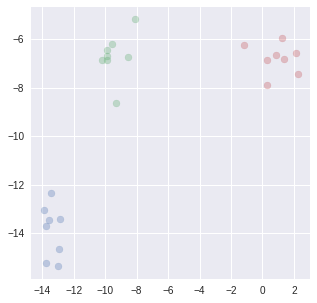

In [16]:
N, n_feature = 8, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
  
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

print(f'X(shape/dtype/data): {X.shape} / {X.dtype}\n{X.numpy()}\n')
print(f'Y(shape/dtype/data): {Y.shape} / {Y.dtype}\n{Y.numpy()}\n')

### One-hot encoding

X(shape/dtype/data): (24, 2) / <dtype: 'float32'>
[[-1.54359245e+01  1.15053940e+01]
 [-1.20450029e+01  9.03123951e+00]
 [-1.30524502e+01  1.05552711e+01]
 [-1.35546923e+01  9.59269333e+00]
 [-1.29231558e+01  1.01436987e+01]
 [-1.32197285e+01  9.55993176e+00]
 [-1.46381054e+01  1.10598841e+01]
 [-1.36899118e+01  1.10359783e+01]
 [ 1.71370912e+00 -7.89160395e+00]
 [ 1.22292936e-02 -6.68984652e+00]
 [ 4.29216683e-01 -8.08988476e+00]
 [-9.44044948e-01 -9.23808098e+00]
 [-1.48234516e-01 -7.10675526e+00]
 [ 2.68500626e-01 -8.17953682e+00]
 [-7.88846731e-01 -8.32436562e+00]
 [-7.57920802e-01 -9.51507664e+00]
 [-1.00648613e+01 -3.25306320e+00]
 [-1.13553791e+01 -3.62990308e+00]
 [-1.03246765e+01 -4.02420092e+00]
 [-1.25956459e+01 -4.28969002e+00]
 [-1.05909958e+01 -1.50241435e+00]
 [-1.22403069e+01 -3.85962224e+00]
 [-1.00880661e+01 -3.37707973e+00]
 [-1.04353304e+01 -3.81953669e+00]]

Y(shape/dtype/data): (24, 3) / <dtype: 'int32'>
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 

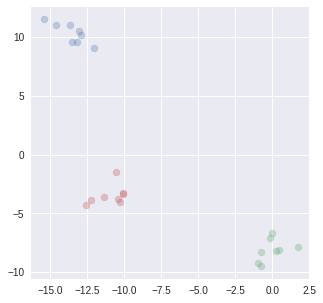

In [19]:
N, n_feature = 8, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
  
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N, ), dtype=tf.int32)

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

print(f'X(shape/dtype/data): {X.shape} / {X.dtype}\n{X.numpy()}\n')
print(f'Y(shape/dtype/data): {Y.shape} / {Y.dtype}\n{Y.numpy()}\n')

## Dataset Objects

In [24]:
N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size).shuffle(100)

for x, y in dataset:
  print(x.shape, y.shape)

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)


# 4-2: Mean Squared Error

## MSE Calculation

In [25]:
from tensorflow.keras.losses import MeanSquaredError

In [28]:
loss_object = MeanSquaredError()

batch_size = 32
predictions = tf.random.normal(shape=(batch_size, 1))
labels = tf.random.normal(shape=(batch_size, 1))

mse = loss_object(labels, predictions)
mse_manual = tf.reduce_mean(tf.math.pow(labels - predictions, 2))

print('MSE(tensorflow): ', mse.numpy())
print('MSE(manual): ', mse_manual.numpy())

MSE(tensorflow):  1.8886521
MSE(manual):  1.8886521


## MSE with Model/Dataset

In [29]:
from tensorflow.keras.layers import Dense

In [30]:
N, n_feature = 100, 5
batch_size = 32

X = tf.random.normal(shape=(N, n_feature))
Y = tf.random.normal(shape=(N, 1))

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(1, activation='linear')
loss_object = MeanSquaredError()

for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(loss.numpy())

1.9555417
1.4265127
1.7225789
5.9868035


# 4-3: Binary Cross Entropy

## BCE Calculation

In [31]:
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
batch_size = 32
n_class = 2

predictions = tf.random.uniform(shape=(batch_size, 1), minval=0, maxval=1, dtype=tf.float32)
labels = tf.random.uniform(shape=(batch_size, 1), minval=0, maxval=n_class, dtype=tf.int32)

loss_object = BinaryCrossentropy()
loss = loss_object(labels, predictions)

labels = tf.cast(labels, tf.float32)
bce_man = -(labels * tf.math.log(predictions) + (1-labels) * tf.math.log(1-predictions))
bce_man = tf.reduce_mean(bce_man)

print('BCE(tensorflow): ', loss.numpy())
print('BCE(manual): ', bce_man.numpy())

BCE(tensorflow):  1.1120467
BCE(manual):  1.1120479


## BCE with Model/Dataset

In [34]:
N, n_feature = 100, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias
Y = tf.cast(Y > 5, tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(1, activation='sigmoid')
loss_object = BinaryCrossentropy()

for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(loss.numpy())

1.0030099
0.93802154
0.6815106
1.1406484


# 4-4: Sparse Categorical Cross Entropy

## SCCE Calculation

In [35]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [39]:
batch_size, n_class = 16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class), minval=0, maxval=1, dtype=tf.float32)
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))
predictions = predictions / pred_sum

labels = tf.random.uniform(shape=(batch_size, ), minval=0, maxval=n_class, dtype=tf.int32)

loss_object = SparseCategoricalCrossentropy()
loss = loss_object(labels, predictions)

print(loss.numpy())

ce = 0
for label, prediction in zip(labels, predictions):
  ce += -tf.math.log(prediction[label])

ce /= batch_size
print(ce.numpy())

1.5368652
1.5368651


## SCCE with Model/Dataset

In [45]:
N, n_feature = 100, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
  
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = SparseCategoricalCrossentropy()

for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(loss.numpy())

0.37251
0.42828035
0.3727564
0.3347372
0.4349484
0.41231084
5.652525
7.497614
7.232174
7.4231825
7.4475145
7.252724
6.35942
5.869245
5.3780155
5.3473444
5.379682
5.4670196
4.9216127
2.7948384
3.3956823
2.733775
3.145323
2.9576726
2.8031812
23.83277
23.617529
23.272228
23.733078
24.280697
23.791882
23.530888


# 4-5: Categorical Cross Entropy

## CCE Calculation

In [46]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [53]:
batch_size, n_class = 16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class), minval=0, maxval=1, dtype=tf.float32)
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))
predictions = predictions / pred_sum

labels = tf.random.uniform(shape=(batch_size, ), minval=0, maxval=n_class, dtype=tf.int32)
labels = tf.one_hot(labels, n_class)

loss_object = CategoricalCrossentropy()
loss = loss_object(labels, predictions)

print('CCE(tensorflow): ', loss.numpy())

cce_man = tf.reduce_mean(tf.reduce_sum(-labels * tf.math.log(predictions), axis=1))
print('CCE(Manual): ', cce_man.numpy())

CCE(tensorflow):  1.8049176
CCE(Manual):  1.8049177


## CCE with Model/Dataset

In [55]:
N, n_feature = 100, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
  
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N, ), dtype=tf.int32)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = CategoricalCrossentropy()

for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(loss.numpy())

1.7767962
1.7831233
1.6861603
1.7866278
1.4890288
1.6906695
1.1400774
1.0847778
1.0407948
0.98430955
0.9538545
1.0256298
0.7819178
0.7069526
0.37621152
0.4359098
0.3937506
0.47248152
2.6859064
9.100187
8.401717
9.426914
8.519398
9.032301
8.800534
3.8339128
3.9088569
3.8761365
3.8809135
3.8269434
3.75699
3.8282452
